# Getting Started with *pyFTracks* v 1.0

**Romain Beucher, Roderick Brown, Louis Moresi and Fabian Kohlmann**

The Australian National University
The University of Glasgow
Lithodat

*pyFTracks* is a Python package that can be used to predict Fission Track ages and Track lengths distributions for some given thermal-histories and kinetic parameters.

*pyFTracks* is an open-source project licensed under the MiT license. See LICENSE.md for details.

The functionalities provided are similar to Richard Ketcham HeFTy sofware. 
The main advantage comes from its Python interface which allows users to easily integrate *pyFTracks* with other Python libraries and existing scientific applications.
*pyFTracks* is available on all major operating systems.

For now, *pyFTracks* only provide forward modelling functionalities. Integration with inverse problem schemes is planned for version 2.0.


# Installation

*pyFTracks* is availabe on pypi. The code should work on all major operating systems (Linux, MaxOSx and Windows)

`pip install pyFTracks`

# Importing *pyFTracks*

The recommended way to import pyFTracks is to run:

In [1]:
import pyFTracks as FT

/usr/lib/python3.8/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


# Simple Fission-Track data Predictions

In [2]:
Ns = [31, 19, 56, 67, 88, 6, 18, 40, 36, 54, 35, 52, 51, 47, 27, 36, 64, 68, 61, 30]
Ni = [41, 22, 63, 71, 90, 7, 14, 41, 49, 79, 52, 76, 74, 66, 39, 44, 86, 90, 91, 41]

zeta = 350. # megayears * 1e6 * u.cm2
zeta_err = 10. / 350.
rhod = 1.304 # 1e6 * u.cm**-2
rhod_err = 0.
Nd = 2936

In [3]:
FT.central_age(Ns, Ni, zeta, zeta_err, rhod, Nd)

{'Central': 175.5672998835018,
 'se': 8.510137020148957,
 'sigma': 5.1978616298287776e-05}

In [4]:
FT.pooled_age(Ns, Ni, zeta, zeta_err, rhod, Nd)

{'Pooled Age': 175.56729987574315, 'se': 9.878490119317705}

In [5]:
FT.single_grain_ages(Ns, Ni, zeta, zeta_err, rhod, Nd)

{'Age(s)': array([170.27277726, 194.12922188, 199.71847392, 211.82501094,
        219.35417906, 192.69120201, 286.91906312, 218.87597033,
        165.51402406, 154.12751783, 151.7948727 , 154.27595627,
        155.38512454, 160.49155828, 156.07978109, 184.05633985,
        167.62488355, 170.15231471, 151.18251036, 164.84973261]),
 'se(s)': array([ 40.93820562,  61.15626671,  37.30358567,  36.79102639,
         33.72043367, 107.40365187, 102.70782874,  49.20922289,
         36.7660512 ,  27.71454167,  33.5872093 ,  28.25634367,
         28.7686159 ,  31.11427488,  39.43447289,  41.83466447,
         28.25353735,  27.94537164,  25.54017193,  40.0012906 ])}

In [6]:
FT.chi2_test(Ns, Ni)

0.9292129985459694

# Included datasets

*pyFTracks* comes with some sample datasets that can be used for testing and designing general code.

In [7]:
from pyFTracks.ressources import Gleadow
from pyFTracks.ressources import Miller1995

Index([], dtype='object')
Index(['Ns', 'Ni', 'A'], dtype='object')
Index([], dtype='object')
Index(['Ns', 'Ni', 'A'], dtype='object')


In [8]:
Gleadow

,Ns,Ni,A,Ns/Ni,RhoS,RhoI,Ages,Ages Errors
0,0,11,24,0.000000,0.000000e+00,5.876068e+05,0.000000,0.000000
1,2,11,44,0.181818,5.827506e+04,3.205128e+05,43.278037,33.277678
2,18,28,32,0.642857,7.211538e+05,1.121795e+06,151.733746,45.925582
3,2,4,40,0.500000,6.410256e+04,1.282051e+05,118.322435,102.493500
4,10,78,90,0.128205,1.424501e+05,1.111111e+06,30.546742,10.275749
5,3,22,30,0.136364,1.282051e+05,9.401709e+05,32.485736,20.002575
6,4,8,40,0.500000,1.282051e+05,2.564103e+05,118.322435,72.490296
7,20,57,50,0.350877,5.128205e+05,1.461538e+06,83.259997,21.693098
8,52,129,20,0.403101,3.333333e+06,8.269231e+06,95.560756,15.795966
9,2,7,45,0.285714,5.698006e+04,1.994302e+05,67.878517,54.438305


In [9]:
FT.central_age(Gleadow.Ns,
               Gleadow.Ni,
               Gleadow.zeta,
               Gleadow.zeta_error,
               Gleadow.rhod,
               Gleadow.nd)

{'Central': 94.09935886162337,
 'se': 10.252612361117954,
 'sigma': 0.446112700671759}

In [10]:
Miller1995

,Ns,Ni,A,Ns/Ni,RhoS,RhoI,Ages,Ages Errors
0,31,41,40,0.756098,8.602509e+05,1.137751e+06,170.272777,40.938206
1,19,22,20,0.863636,1.054501e+06,1.221001e+06,194.129222,61.156267
2,56,63,60,0.888889,1.036001e+06,1.165501e+06,199.718474,37.303586
3,67,71,80,0.943662,9.296259e+05,9.851260e+05,211.825011,36.791026
4,88,90,90,0.977778,1.085334e+06,1.110001e+06,219.354179,33.720434
5,6,7,15,0.857143,4.440004e+05,5.180005e+05,192.691202,107.403652
6,18,14,20,1.285714,9.990010e+05,7.770008e+05,286.919063,102.707829
7,40,41,40,0.975610,1.110001e+06,1.137751e+06,218.875970,49.209223
8,36,49,40,0.734694,9.990010e+05,1.359751e+06,165.514024,36.766051
9,54,79,60,0.683544,9.990010e+05,1.461501e+06,154.127518,27.714542


In [11]:
FT.central_age(Miller1995.Ns,
               Miller1995.Ni,
               Miller1995.zeta,
               Miller1995.zeta_error,
               Miller1995.rhod,
               Miller1995.nd)

{'Central': 175.5672998835018,
 'se': 14332.027006873097,
 'sigma': 5.1978616298287776e-05}

In [12]:
Miller1995.calculate_central_age()

{'Central': 175.5672998835018,
 'se': 14332.027006873097,
 'sigma': 5.1978616298287776e-05}

In [13]:
Miller1995.calculate_pooled_age()

{'Pooled Age': 175.56729987574315, 'se': 9.878490119317705}

In [14]:
Miller1995.calculate_ages()

{'Ages': [170.2727772640975,
  194.12922187599696,
  199.71847392127856,
  211.82501093801739,
  219.35417905655055,
  192.69120201058783,
  286.9190631239537,
  218.87597033417916,
  165.51402406094212,
  154.12751782896967,
  151.794872702224,
  154.27595627096636,
  155.3851245378071,
  160.49155827680758,
  156.07978109227116,
  184.05633985285064,
  167.62488355180588,
  170.15231471139003,
  151.18251036284565,
  164.84973261253256],
 'Ages Errors': [40.93820562355294,
  61.15626671371068,
  37.30358567232624,
  36.7910263894117,
  33.72043366931745,
  107.40365186503979,
  102.7078287392375,
  49.20922289475659,
  36.76605120432735,
  27.714541673022094,
  33.58720930380308,
  28.25634366989746,
  28.768615902243397,
  31.114274880491372,
  39.434472886917085,
  41.83466446876438,
  28.25353734688477,
  27.94537164366046,
  25.54017192729246,
  40.001290595963304]}

# The Sample Class

# Specify a Thermal history

In [15]:
from pint import UnitRegistry
import numpy as np

u = UnitRegistry()

In [16]:
thermal_history = FT.ThermalHistory(name="My Thermal History",
                  time=u.Quantity([0., 43., 44., 100.],u.megayears),
                  temperature=u.Quantity([10., 10., 130., 130.], u.degC))

In [17]:
import matplotlib.pyplot as plt

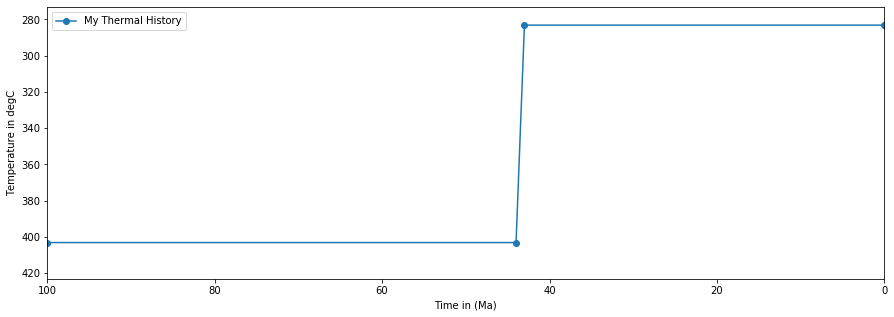

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(thermal_history.input_time.magnitude, thermal_history.input_temperature.magnitude, label=thermal_history.name, marker="o")
plt.xlim(100., 0.)
plt.ylim(150. + 273.15, 0.+273.15)
plt.ylabel("Temperature in degC")
plt.xlabel("Time in (Ma)")
plt.legend()

## Specify an Annealing Model

In [19]:
model1 = FT.Ketcham1999(thermal_history)

In [20]:
%matplotlib tk
#%matplotlib notebook # Would be ideal as it would keep everything in the notebook...

In [21]:
FT.Viewer(model1)

In [22]:
model2 = FT.Ketcham2007(thermal_history)

In [23]:
FT.Viewer(model2)

In [24]:
from pyFTracks.thermal_history import WOLF1

In [25]:
model3 = FT.Ketcham1999(WOLF1)

In [26]:
FT.Viewer(model3)